In [26]:
import os
import cv2
import numpy as np
import pandas as pd

In [24]:
video = cv2.VideoCapture('PPGsample1.mp4')
ret, frame = video.read()
width = int(video.get(3))
height = int(video.get(4))
fps = video.get(5)
length = int(video.get(7))/fps
print 'Video Width: ', width, 'px'
print 'Video Height: ', height, 'px'
print 'Video FPS: ', fps, 'frames per second'
print 'Video Length: ', length, 's'

Video Width:  1920 px
Video Height:  1080 px
Video FPS:  30.323427803 frames per second
Video Length:  30.1746888889 s


In [9]:
def readFrame():
    hasFrame, frame = video.read();
    if not hasFrame:
        return False, 0, 0, 0
    totalRed = 0
    totalGreen = 0
    totalBlue = 0
    for col in range(0, width):
        # adds up all of the color values for each pixel in the frame
        # returns average value per pixel
        for row in range(0, height):
            totalRed += frame[row][col][2]
            totalGreen += frame[row][col][1]
            totalBlue += frame[row][col][0]
    return True, totalRed/1.0/width/height, totalGreen/1.0/width/height, totalBlue/1.0/width/height
    

In [15]:
redValues = []
greenValues = []
blueValues= []

while True:
    hasFrame, r, g, b = readFrame()
    if not hasFrame:
        break
    else:
        redValues.append(r)
        greenValues.append(g)
        blueValues.append(b)
        print(r, g, b)

(200.42555989583332, 54.522595486111108, 3.725595100308642)
(200.23319492669754, 54.847917631172841, 3.002315779320988)
(200.39337818287038, 55.341190200617284, 2.8496272183641977)
(200.63168547453702, 55.683624614197534, 2.8916401427469136)
(200.86895447530864, 55.998163580246917, 2.9675260416666664)
(201.12048611111112, 56.314322916666669, 3.0266304976851854)
(201.43906201774692, 56.717355324074077, 3.0914221643518518)
(201.7798895640432, 57.129979263117285, 3.1414824459876542)
(202.07131992669753, 57.525923996913583, 3.1966227816358028)
(201.62525559413578, 57.009791666666665, 3.1619815779320986)
(199.30130208333333, 54.000158179012345, 3.1201340663580246)
(197.29329089506174, 51.401979648919756, 3.0369531250000001)
(196.5105724344136, 50.398617380401234, 3.0047087191358024)
(196.41500482253085, 50.726534529320993, 3.0615489969135803)
(196.39206114969136, 50.644513406635802, 3.0567780671296299)
(196.30760609567901, 50.380051601080247, 3.0404890046296296)
(196.10138888888889, 49.8609

TypeError: 'NoneType' object has no attribute '__getitem__'

In [21]:
#takes a long time to process video, so save to file
def writeToFile(fileName, rL, gL, bL):
    colors = [rL, gL, bL]
    np.savetxt(fileName, colors)
writeToFile('color-values-PPG1.txt', redValues, greenValues, blueValues)

In [43]:
#get video from file, which is much faster than processing again
def readFromFile(fileName):
    l =np.loadtxt(fileName)
    return l[0], l[1], l[2]
redValues, greenValues, blueValues = readFromFile('color-values-PPG1.txt')

In [25]:
def constructTimeList(numElements, deltaTime):
    times = [0]
    for i in range(1, numElements):
        times.append(times[i-1]+deltaTime)
    return times
ppgTimes = constructTimeList(len(redValues), 1/fps)

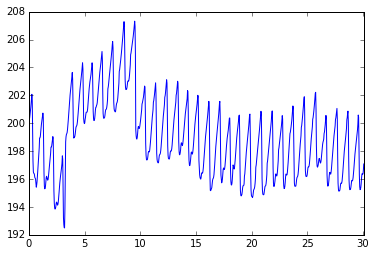

In [34]:
#Graphing the red values
redSeries = pd.Series(redValues, index = ppgTimes)
%matplotlib inline
redSeries.plot()

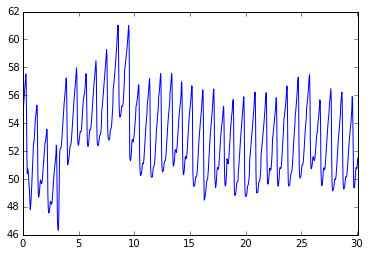

In [38]:
#Graphing the green values
greenSeries = pd.Series(greenValues, index = ppgTimes)
greenSeries.plot()

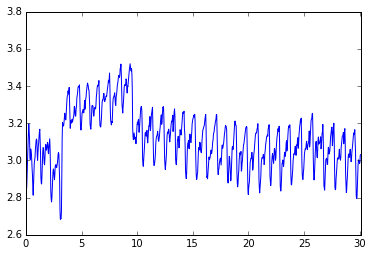

In [37]:
#Graphing the blue values
blueSeries = pd.Series(blueValues, index = ppgTimes)
blueSeries.plot()

In [44]:
#The second sample:
video2 = cv2.VideoCapture("PPGsample2.mp4")
ret, frame = video.read()
width = int(video.get(3))
height = int(video.get(4))
fps = video.get(5)
length = int(video.get(7))/fps
print 'Video Width: ', width, 'px'
print 'Video Height: ', height, 'px'
print 'Video FPS: ', fps, 'frames per second'
print 'Video Length: ', length, 's'
#Processing the video takes a lot of time,
#so this is going to be from a text file of a pre-processed video
redValues, greenValues, blueValues = readFromFile('color-values-PPG2.txt')
ppg2Times = constructTimeList(len(redValues), 1/fps)


Video Width:  1920 px
Video Height:  1080 px
Video FPS:  30.323427803 frames per second
Video Length:  30.1746888889 s


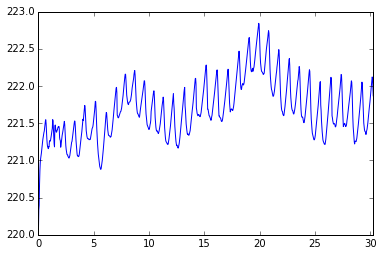

In [47]:
#Red values for second sample
redSeries = pd.Series(redValues,ppg2Times)
redSeries.plot()

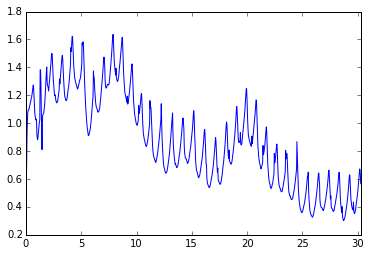

In [49]:
#Green values for second sample
greenSeries = pd.Series(greenValues,ppg2Times)
greenSeries.plot()

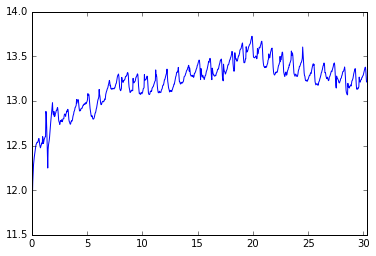

In [51]:
#Blue values for second sample
blueSeries = pd.Series(blueValues,ppg2Times)
blueSeries.plot()